In [1]:
import pandas as pd
import numpy as np
import os
import math

* data load

In [2]:
norm_arr = np.load('/workspace/data/norm_arr.npy', allow_pickle=True)

In [3]:
dn_arr = np.load('/workspace/data/dnanorm_arr.npy', allow_pickle=True)

In [4]:
up_arr = np.load('/workspace/data/upanorm_arr.npy', allow_pickle=True)

* nan remove

In [5]:
re_norm_arr = []
for dt in norm_arr:
    dt = dt.flatten()
    newlist = [x for x in dt if math.isnan(x) == False]
    re_norm_arr.append(newlist)

In [6]:
re_dn_arr = []
for dt in dn_arr:
    dt = dt.flatten()
    newlist = [x for x in dt if math.isnan(x) == False]
    re_dn_arr.append(newlist)

In [7]:
re_up_arr = []
for dt in up_arr:
    dt = dt.flatten()
    newlist = [x for x in dt if math.isnan(x) == False]
    re_up_arr.append(newlist)

* lenth: 0 remove

In [8]:
norm_lt = []
for dt in re_norm_arr:
  len_ch = len(dt)
  if len_ch > 0:
    norm_lt.append(dt)
  else:
    pass

In [9]:
dn_lt = []
for dt in re_dn_arr:
  len_ch = len(dt)
  if len_ch > 0:
    dn_lt.append(dt)
  else:
    pass

In [10]:
up_lt = []
for dt in re_up_arr:
  len_ch = len(dt)
  if len_ch > 0:
    up_lt.append(dt)
  else:
    pass

In [11]:
print(len(norm_arr), len(norm_lt), len(dn_arr), len(dn_lt), len(up_arr), len(up_lt))

3379 3181 1767 1756 230 230


* lenth chech

In [12]:
norm_len_ch = []
for dt in norm_lt:
  norm_len_ch.append(len(dt))

In [13]:
dn_len_ch = []
for dt in dn_lt:
  dn_len_ch.append(len(dt))

In [14]:
up_len_ch = []
for dt in up_lt:
  up_len_ch.append(len(dt))

In [15]:
min(norm_len_ch)

1

In [16]:
min(dn_len_ch)

1

In [17]:
min(up_len_ch)

1

* sensor to image

In [18]:
!pip install pyts

^C


In [19]:
from pyts.image import MarkovTransitionField
transformer = MarkovTransitionField()

ModuleNotFoundError: No module named 'pyts'

* cut

In [ ]:
s2i_norm = []
for dt in norm_lt[:300]:
  if len(dt) >= 224:
    s2i_norm.append(dt[:224])
  else:
    pass

In [ ]:
s2i_dn = []
for dt in dn_lt[:300]:
  if len(dt) >= 224:
    s2i_dn.append(dt[:224])
  else:
    pass

In [ ]:
s2i_up = []
for dt in up_lt:
  if len(dt) >= 224:
    s2i_up.append(dt[:224])
  else:
    pass

In [ ]:
len(s2i_norm)

299

In [ ]:
len(s2i_dn)

299

In [ ]:
len(s2i_up)

228

In [ ]:
train_lt = s2i_norm[:200] + s2i_dn[:200] + s2i_up[:200]

In [ ]:
len(train_lt)

600

In [ ]:
train_x = transformer.transform(train_lt)

/usr/local/lib/python3.7/dist-packages/pyts/preprocessing/discretizer.py:171: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [0 1 2 3 4 5]. Consider decreasing the number of bins or removing these samples.
  .format(samples))


In [ ]:
import matplotlib.pyplot as plt

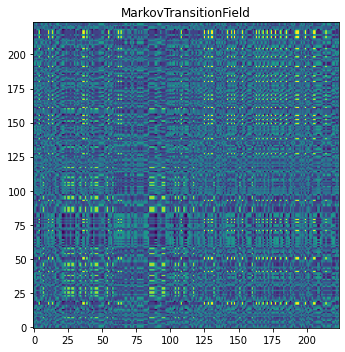

In [ ]:
plt.figure(figsize=(5, 5))
plt.imshow(train_x[0], origin='lower')
plt.title('MarkovTransitionField')
plt.tight_layout()
plt.show()

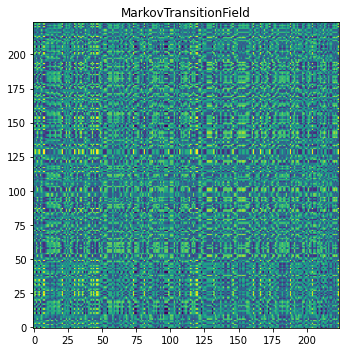

In [ ]:
plt.figure(figsize=(5, 5))
plt.imshow(train_x[-1], origin='lower')
plt.title('MarkovTransitionField')
plt.tight_layout()
plt.show()

In [ ]:
norm_lb = []
for i in norm_data:
  norm_lb.append([0, 0, 1])

In [ ]:
up_lb = []
for i in up_data:
  up_lb.append([0, 1, 0])

In [ ]:
dn_lb = []
for i in dn_data:
  dn_lb.append([1, 0, 0])

In [ ]:
len(norm_data[:200])

200

In [ ]:
len(up_data[:200])

200

In [ ]:
train_y = list(norm_lb[:200]) + list(up_lb[:200]) + list(dn_lb[:200])

In [ ]:
len(train_y)

600

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

def create_vggnet(in_shape=(224, 224, 3), n_classes=3):
    input_tensor = Input(shape=in_shape)
    
    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(input_tensor)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), (2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = MaxPooling2D((2, 2), name='block5_pool')(x)




    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    x = Dense(units = 120, activation = 'relu')(x)
    x = Dropout(0.5)(x)

    # 마지막 softmax 층 적용. 
    output = Dense(units = n_classes, activation = 'softmax')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    model.summary()
    
    return model

In [ ]:
model = create_vggnet(in_shape=(224, 224, 3), n_classes=3)


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
IMAGE_SIZE = 224
BATCH_SIZE = 8

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
train_x_rgb = []
for dt in train_x:
  train_x_rgb.append(np.array([dt, dt, dt]).reshape(224, 224, 3))

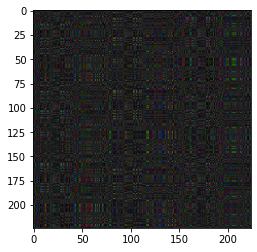

In [ ]:
plt.imshow(train_x_rgb[0])

In [ ]:
train_x = np.asarray(train_x_rgb)
train_y = np.asarray(train_y)

In [ ]:
history = model.fit(x=train_x, y=train_y, epochs=20, 
                    batch_size=BATCH_SIZE)

Epoch 1/20
75/75 [==============================] - 12s 148ms/step - loss: 1.4297 - accuracy: 0.3433
Epoch 2/20
75/75 [==============================] - 11s 151ms/step - loss: 1.1010 - accuracy: 0.2967
Epoch 3/20
75/75 [==============================] - 11s 145ms/step - loss: 1.1013 - accuracy: 0.3167
Epoch 4/20
75/75 [==============================] - 11s 144ms/step - loss: 1.1003 - accuracy: 0.3350
Epoch 5/20
75/75 [==============================] - 11s 142ms/step - loss: 1.1001 - accuracy: 0.3100
Epoch 6/20
75/75 [==============================] - 11s 142ms/step - loss: 1.1000 - accuracy: 0.3117
Epoch 7/20
75/75 [==============================] - 11s 141ms/step - loss: 1.0983 - accuracy: 0.3383
Epoch 8/20
75/75 [==============================] - 11s 142ms/step - loss: 1.0997 - accuracy: 0.3200
Epoch 9/20
75/75 [==============================] - 11s 143ms/step - loss: 1.0997 - accuracy: 0.3150
Epoch 10/20
75/75 [==============================] - 11s 142ms/step - loss: 1.0974 - accura